In [17]:
import re
import os
from IPython.display import Image
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import matplotlib.ticker as plticker
import json

class CustomRuntimeError(Exception):
    """Something failed in runtime"""
    def __init__(self,filename,message):
        self.filename = filename
        self.message = message

nvprof = "/usr/local/cuda-10.2/bin/nvprof"

def convolve(isize,fsize,static = 0):
#     @izise is the size of generated image for benchmarking, @fsize is filter size(diameter), @static is wether to use statically known filter-size funtions  
    commands = [
#         f"{nvprof} --normalized-time-unit ms ./filter_spec.out --isize={isize} --fsize={fsize} --test=0 2> filter_spec.txt",
#         f"{nvprof} --normalized-time-unit ms ./filter.out --isize={isize} --fsize={fsize} --static={static} --test=0 2> filter.txt",
        f" ./filter_spec.out --isize={isize} --fsize={fsize} --test=0 > filter_spec.txt",
        f" ./filter.out --isize={isize} --fsize={fsize} --static=0 --test=0 > filter.txt",
        f" ./filter.out --isize={isize} --fsize={fsize} --static=1 --test=0 > filter_unroll.txt",
        
        
    ]
    if(static == 0):
        for command in commands[:2]:
            if(os.system(command) == 0):
                continue
            raise CustomRuntimeError(command,"")
    else:
        for command in commands:
            if(os.system(command) == 0):
                continue
            raise CustomRuntimeError(command,"") 

files = [
    "filter_spec.txt",
    "filter.txt",
    "filter_unroll.txt"
]

def time(static):
    rePatt = re.compile('runtime')
    reNumber = re.compile('[-+]?[0-9]*\.?[0-9]+[eE]?[-+]?[0-9]+')
    result = []
    entry = []
    if(static):
        for f in files:
            with open(f) as fr:
                val = 0
                dev = 0
                for line in fr:
                    if(rePatt.findall(line) != []):
                        val = val + (float(reNumber.findall(line)[0]))
                        dev = dev + (float(reNumber.findall(line)[1]))
                result.append([val,dev])
    else:
        for f in files[:2]:
            with open(f) as fr:
                val = 0
                dev = 0
                for line in fr:
                    if(rePatt.findall(line) != []):
                        val = val + (float(reNumber.findall(line)[0]))
                        dev = dev + (float(reNumber.findall(line)[1]))
                result.append([val,dev])
        result.append([0,0])
    return result

# for compile-time known kernel sizes
filters1 = [15,31,63,127,255]
# for runtime known
filters2 = [i for i in range(3,256,2)]
# filters2 = [i for i in range(203,256,2)]


def test(filters,outputfile):
    res = []
    for f in filters:
        print(f)
        if f in filters1:
            convolve(16384,f,1)
            res.append(time(1))
        else:
            convolve(16384,f,0)
            res.append(time(0))
        
    with open(outputfile,'w') as cts:
            cts.write(json.dumps(res))
    return res


test(filters2,"convolution_dump1.json")


3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103
105
107
109
111
113
115
117
119
121
123
125
127
129
131
133
135
137
139
141
143
145
147
149
151
153
155
157
159
161
163
165
167
169
171
173
175
177
179
181
183
185
187
189
191
193
195
197
199
201
203
205
207
209
211
213
215
217
219
221
223
225
227
229
231
233
235
237
239
241
243
245
247
249
251
253
255


[[[53.0999, 3.2372270000000003], [59.29900000000001, 0.0807415], [0, 0]],
 [[50.797200000000004, 0.02933966], [68.4538, 0.1469838], [0, 0]],
 [[51.168, 0.03506692], [75.6345, 1.2597907000000002], [0, 0]],
 [[51.4179, 0.03555639], [75.2975, 0.1476324], [0, 0]],
 [[50.2158, 0.039774130000000005], [80.6571, 0.1337908], [0, 0]],
 [[50.9071, 0.008329079999999999], [80.52099999999999, 0.12837966], [0, 0]],
 [[54.5172, 0.00547699], [86.9848, 0.148361], [54.5392, 0.1443189]],
 [[58.659400000000005, 0.01482947], [93.569, 0.11541320000000001], [0, 0]],
 [[62.9447, 0.15730929999999999], [100.2852, 0.12829489], [0, 0]],
 [[68.218, 0.511329], [103.0102, 0.14801844], [0, 0]],
 [[73.8885, 0.18295029999999998], [109.57, 0.1554157], [0, 0]],
 [[79.30850000000001, 0.452582], [116.9614, 0.1937126], [0, 0]],
 [[84.919, 0.11332616999999999], [123.0816, 0.2368189], [0, 0]],
 [[91.2042, 0.10073266], [131.7552, 0.15457552], [0, 0]],
 [[97.042, 0.11025549], [138.4463, 0.18230912], [97.1625, 1.6510195]],
 [[102

[[56.337126999999995, 50.82653966, 51.20306692, 51.45345639000001, 50.25557413, 50.91542908, 54.52267699, 58.67422947000001, 63.1020093, 68.729329, 74.0714503, 79.76108200000002, 85.03232616999999, 91.30493266, 97.15225549, 102.57487436, 109.69329002, 116.333117, 121.84602619999998, 126.85971808, 132.7418279, 139.0861798, 144.6684907, 150.54953646, 156.59052658000002, 169.26133, 168.49942654, 174.60804940000003, 182.89102490000002, 186.25810758, 192.35999188, 199.00072525000002, 206.368198, 210.70958113999998, 216.67339384, 223.16085099999998, 230.38471619999999, 234.47295048000004, 240.45983182999998, 246.4147245, 252.2354816, 258.29615654, 264.26852315, 270.06014132, 276.05435205, 282.0057294, 288.79023039, 293.85421836999996, 300.01066019999996, 305.7802744, 311.7889583, 317.55088549, 323.53999592, 329.59268060000005, 335.43938152, 341.30131240000003, 347.1252295, 353.06163220999997, 359.50910070000003, 365.0887071, 370.85301229, 376.8346361, 382.89727610000006, 396.273261, 403.0752

<IPython.core.display.Javascript object>


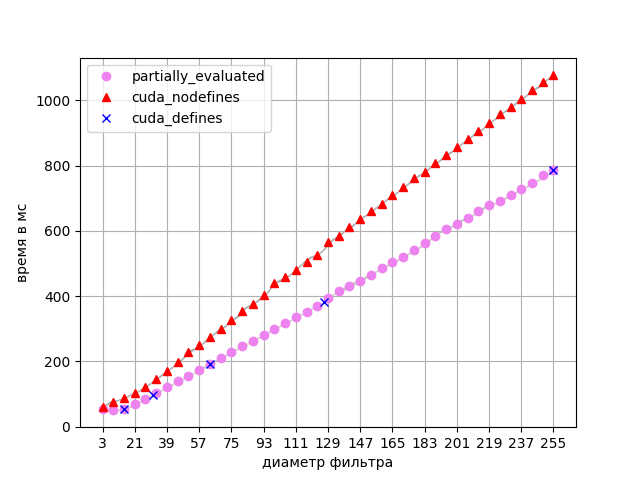

In [20]:
import re
import os
from IPython.display import Image
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import math
import matplotlib.ticker as plticker
import json

# for compile-time known kernel sizes
# filters1 = [15,31,63,127,255]
# for runtime known
# filters2 = [i for i in range(203,256,2)]

def red(test_list):
    res = [0 for i in range(0,len(test_list[0]))];#12
    for i in test_list: #for each pair
        for j in range(0,len(res)):#7
            res[j]+=(i[j])
    return list(map(lambda x : x / len(test_list) ,res))

def build_set(test_list):
    res = [[] for i in range(0,len(test_list[0][0]))]
    for i in test_list: #for each filter size
        data = red(i) #average for specific run
        for j in range(0,len(test_list[0][0])):
            res[j].append(data[j])
    return res

def deviation(test_list,avg):
    dev = [[0 for i in range(len(test_list[0][0]))] for j in range(len(test_list))] #for each size
    for i in range(len(test_list)): #for each size
        for j in range(len(test_list[i])): #for each clock
            for e in range(len(test_list[i][j])):
                dev[i][e] = dev[i][e] + (((test_list[i][j][e] - avg[e][i])**2) / (len(test_list[i])-1)) #std dev
    res = [[] for i in range(len(avg))]
    for i in range(len(avg)): #for each algorithm
        for e in dev: #for each size
             res[i].append(math.sqrt(e[i]))
    return res

data = []
with open("convolution_dump1.json",'rb') as dump:
    source = dump.read()
    data = json.loads(source)
    
    
# empirical_avg = build_set_float(data)
empirical_avg = [[float(i[j][0]) for i in data] for j in range(0,len(data[0]))]

# dev = deviation_float(data,empirical_avg)
dev = [[float(i[j][1]) for i in data] for j in range(0,len(data[0]))]



mns_devplus = [[empirical_avg[j][i]+dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]
mns_devminus = [[empirical_avg[j][i]-dev[j][i] for i in range(len(empirical_avg[j]))] for j in range(len(empirical_avg))]

print(mns_devplus)
# print(build_set(spec_vs_ha))
# print(deviation(spec_vs_handtuned,build_set(spec_vs_handtuned)))

yticks = [i for i in range(40,541,40)]
# plt.yticks(yticks)
plt.xticks(filters2[::9])
plt.grid()

# spec_vs_default_final = []
# spec_vs_tuned_final = []

# with open("filter_hand",'rb') as dump:
#     source = dump.read()
#     spec_vs_tuned_final = json.loads(source)

# with open("filter_default",'rb') as dump:
#     source = dump.read()
#     spec_vs_default_final = json.loads(source)

# average time for spec and default implementations    
# avg_spec_default = build_set(spec_vs_default_final)
# standard deviation
# spec_hand_div = deviation(spec_vs_default_final,avg_spec_default)


# mns_devplus = [[avg_spec_default[j][i]+spec_hand_div[j][i] for i in range(len(avg_spec_default[j]))] for j in range(len(avg_spec_hand))]
# mns_devminus = [[avg_spec_default[j][i]-spec_hand_div[j][i] for i in range(len(avg_spec_default[j]))] for j in range(len(avg_spec_hand))]


plt.fill_between(filters2[::2],mns_devplus[0][::2],mns_devminus[0][::2],interpolate=False,color='gray', alpha=0.3)
plt.fill_between(filters2[::2],mns_devplus[1][::2],mns_devminus[1][::2],interpolate=False,color='gray', alpha=0.5)
# plt.fill_between(filters1,[i[1] for i in enumerate(mns_devminus[2]) if filters2[i[0]] in filters1],[i[1] for i in enumerate(mns_devplus[2]) if filters2[i[0]] in filters1],interpolate=False,color='gray', alpha=0.3)

plt.plot(filters2[::3],empirical_avg[0][::3],'o',label='partially_evaluated',color='violet',markersize=6)
plt.plot(filters2[::3],empirical_avg[1][::3],'^',label='cuda_nodefines',color='red',markersize=6)
plt.plot(filters1,[i[1] for i in enumerate(empirical_avg[2]) if filters2[i[0]] in filters1],'x',label='cuda_defines',color='blue',markersize=6)
# plot hand tuned cuda version
# plt.plot(filters1,build_set(spec_vs_tuned_final)[1],'x',label='cuda_defines',color='blue',markersize=6)

plt.ylabel('время в мс')
plt.xlabel('диаметр фильтра')

plt.legend()
plt.show()
plt.savefig('separable_convolution_pres3.pdf')